<span style="color:purple;font-weight:300;font-size:30px"> 
Assignment 2 - Social Graphs and Interactions
</span>

___________

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Formalia" data-toc-modified-id="Formalia-1">Formalia</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2">Data</a></span></li><li><span><a href="#Basic-Stats" data-toc-modified-id="Basic-Stats-3">Basic Stats</a></span><ul class="toc-item"><li><span><a href="#Answers" data-toc-modified-id="Answers-3.1">Answers</a></span></li></ul></li><li><span><a href="#Communities" data-toc-modified-id="Communities-4">Communities</a></span><ul class="toc-item"><li><span><a href="#Answers" data-toc-modified-id="Answers-4.1">Answers</a></span></li></ul></li><li><span><a href="#Sentiment" data-toc-modified-id="Sentiment-5">Sentiment</a></span><ul class="toc-item"><li><span><a href="#Answers" data-toc-modified-id="Answers-5.1">Answers</a></span></li></ul></li><li><span><a href="#Appendix---Preprocessing-of-data" data-toc-modified-id="Appendix---Preprocessing-of-data-6">Appendix - Preprocessing of data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Obtaining-nodes-and-edges-from-html-text-of-wikipedia-pages" data-toc-modified-id="Obtaining-nodes-and-edges-from-html-text-of-wikipedia-pages-6.0.1">Obtaining nodes and edges from html text of wikipedia pages</a></span></li><li><span><a href="#Obtaining-plain-text,-tokens-and-final-words-from-wikipedia-pages" data-toc-modified-id="Obtaining-plain-text,-tokens-and-final-words-from-wikipedia-pages-6.0.2">Obtaining plain text, tokens and final words from wikipedia pages</a></span></li></ul></li></ul></li></ul></div>

# Formalia

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November 1st, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/ (we won't be doing peergrading, but we'll still use http://peergrade.io/ for the handin.)

_____

In [1]:
# Libraries for the notebook
import pandas as pd
import numpy as np
import random 

import bz2
import pickle
import _pickle as cPickle

# Load any compressed pickle file
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

In [2]:
%%capture
!pip install fa2

from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
from itertools import count

In [3]:
%%capture
!pip install networkx

import networkx as nx
import pandas as pd
import pickle
import regex as re
import math
from collections import Counter

In [4]:
import nltk
import pandas as pd
import nltk, re, pprint
from nltk import word_tokenize
import urllib
from urllib import request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from statistics import mean
from scipy import stats

In [5]:
%%capture
!pip install python-louvain
import community.community_louvain as community
import matplotlib.cm as cm

In [6]:
%%capture
!pip install WordCloud
from wordcloud import WordCloud

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Data

This assignment will be based on the DC and Marvel superhero dataset you downloaded during the Week 4 exercises. It's important that you work with your own dataset.

You will need the network structure and the page texts to complete the assignment.

To show that you have collected these files, please place your files somewhere that's accessible online (e.g. a github repo or a webpage) and link to your files from your notebook. (We will appreciate it if you store the wiki pages in plain text and the network as an edgelist. )

> **Change the paths to local files once data is downloaded from github.**

In [8]:
# Import data from previous weeks

# The files are here on github as a compressed pickle, and once downloaded, we can open it with the function below
url_marvel ='https://github.com/lucialarraona/socialgraphs2022/blob/main/assignments/zip_marvel_pickle_complete.pbz2'
url_dc = 'https://github.com/lucialarraona/socialgraphs2022/blob/main/assignments/zip_dc_pickle.pbz2'

# Here I'm using the link to the file locally (once the zip file has been downloaded)
df_marvel = decompress_pickle('assignments/zip_marvel_pickle_complete_new.pbz2') #change path to local file
df_dc = decompress_pickle('assignments/zip_dc_pickle.pbz2')                      #change path to local file

In [9]:
# Marvel file has nodes,edges, plaint text and tokens/words
print(df_marvel.shape)
df_marvel.head(3)

(1785, 8)


,CharacterName,WikiLink,text_html,nodes,edges,plain_text,tokens,words
0,Abomination,Abomination (character),{{For|the biblical term|Abomination (Bible)}}\...,"[Red Hulk, Silver Surfer, Glenn Talbot, MODOK,...","[(Abomination (character), Red Hulk), (Abomina...",The Abomination is a fictional character appea...,"[The, Abomination, is, a, fictional, character...","[abomination, fictional, character, appearing,..."
1,Absorbing Man,Absorbing Man,{{Short description|Marvel Comics fictional ch...,"[Black Bolt, Spider-Man, She-Hulk, Ethan Edwar...","[(Absorbing Man, Black Bolt), (Absorbing Man, ...","Absorbing Man (Carl ""Crusher"" Creel) is a fict...","[Absorbing, Man, (, Carl, ``, Crusher, '', Cre...","[absorbing, man, carl, crusher, creel, fiction..."
5,Achebe,Achebe (comics),#REDIRECT [[Achebe (character)]]\n\n{{Redirect...,[],[],Achebe is a fictional supervillain appearing i...,"[Achebe, is, a, fictional, supervillain, appea...","[achebe, fictional, supervillain, appearing, a..."


In [10]:
# DC file only has nodes and edges for the first part
print(df_dc.shape)
df_dc.head(3)

(518, 5)


,CharacterName,WikiLink,text,nodes,edges
0,Abin Sur,Abin Sur,{{Refimprove|date=March 2008}}\n{{Infobox comi...,"[Green Lantern, Green Lantern, Martian Manhunt...","[(Abin Sur, Green Lantern), (Abin Sur, Green L..."
1,Abra Kadabra (character),Abra Kadabra (character),{{Infobox comics character\n<!--Wikipedia:Wiki...,"[Wally West, Captain Cold, Weather Wizard, Bat...","[(Abra Kadabra (character), Wally West), (Abra..."
2,Abby Holland,Abby Holland,{{short description|Fictional comic book chara...,"[Anton Arcane, Batman]","[(Abby Holland, Anton Arcane), (Abby Holland, ..."


# Basic Stats
Write a short paragraph describing the network. The paragraph should contain the following information

* The number of nodes and links. 
* The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.

We also want the degree distributions and a plot of the network

* Create in- and out-going degree distributions as described in Lecture 5.
* Estimate the slope of the incoming degree distribtion as described in Lecture 5.
* Plot the network using the Force Atlas algorithm as described in Lecture 5.

(Friendly hint: Remember figure captions.)

________

## Answers
> **1.Write a short paragraph describing the network. The paragraph should contain the following information:**
>* **The number of nodes and links.**
>* **The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.**

>> _Our network consists of 1687 nodes and 11585 links. The network statistics for in-degree and out-degree are as follows:_

|             | **In-degree** | **Out-degree** |
|-------------|:-------------:|:--------------:|
| **Average** |      7.62     |      7.62      |
| **Median**  |       1       |        6       |
| **Mode**    |       0       |        1       |
| **Min**     |       0       |        0       |
| **Max**     |      433      |       54       |
 

In [11]:
# Create network graph with both universes

G = nx.DiGraph()
G.add_nodes_from(df_marvel['WikiLink'].values, universe="Marvel")
G.add_nodes_from(df_dc['WikiLink'].values, universe="DC")
print(G)


col_one_list = df_marvel['edges'].tolist()
col_one_listDC=(df_dc['edges'].tolist())

edges_values_list= col_one_list + col_one_listDC

def flatten(l):
    return [item for sublist in l for item in sublist]

edges_values_tuples = flatten(edges_values_list)

G.add_edges_from(edges_values_tuples)
print(G)

attributes_variable_DC = {row['WikiLink']:{"content" : len(re.findall(r'\w+',row['text']))} for index, row in df_dc.iterrows()}
attributes_variable_marvel = {row['WikiLink']:{"content" : len(re.findall(r'\w+',row['text_html']))} for index, row in df_marvel.iterrows()}

nx.set_node_attributes(G, attributes_variable_DC)
nx.set_node_attributes(G, attributes_variable_marvel)

attribute = nx.get_node_attributes(G, "content")

largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc).copy()
GCC_U = GCC.to_undirected()
print(GCC_U)


DiGraph with 2303 nodes and 0 edges
DiGraph with 2303 nodes and 12869 edges
Graph with 1687 nodes and 11585 edges


In [12]:
def calculate_stats(G, in_degree = True, Marvel = False, DC = False):

    try:

        # --------------- IN DEGREE STATS ------------------------

        #Whole graph
        if in_degree == True and Marvel == False and DC == False:
            degree_list = [val for (node, val) in G.in_degree()]
            print('Whole Graph: In - Degree statistics:')
        
        #Marvel Graph
        elif in_degree == True and Marvel == True and DC == False:
            degree_list = [val for (node, val) in G.in_degree() if G.nodes[node]['universe'] == 'Marvel']
            print('Marvel Graph: In - Degree statistics:')
        
        #DC Graph
        elif in_degree == True and Marvel == False and DC == True:
            degree_list = [val for (node, val) in G.in_degree() if G.nodes[node]['universe'] == 'DC']
            print('DC Graph: In - Degree statistics:')
              
        
        # --------------- OUT DEGREE STATS -------------------------

        #Whole graph
        elif in_degree == False and Marvel == False and DC == False:
            degree_list = [val for (node, val) in G.out_degree()]
            print('Whole Graph: Out - Degree statistics:')
        
        #Marvel Graph
        elif in_degree == False and Marvel == True and DC == False:
            degree_list = [val for (node, val) in G.out_degree() if G.nodes[node]['universe'] == 'Marvel']
            print('Marvel Graph: Out - Degree statistics:')
        
        #DC Graph
        elif in_degree == False and Marvel == False and DC == True:
            degree_list = [val for (node, val) in G.out_degree() if G.nodes[node]['universe'] == 'DC']
            print('DC Graph: Out - Degree statistics:')
        
        
        # Calculate stats
        mean = np.mean(degree_list)
        median = np.median(degree_list)
        mode = stats.mode(degree_list)[0]
        d_min = np.min(degree_list)
        d_max = np.max(degree_list)

        print(f"Mean: {mean}")
        print(f'Median:{median}')
        print(f'Mode:{mode}')
        print(f'Min:{d_min}')
        print(f'Max:{d_max}')
    
    except:
        print('You can´t choose Marvel and DC at the same time. Select one universe or put them both to False')

    return 

In [13]:
# In-degree Graph Marvel
calculate_stats(GCC, in_degree = True, Marvel = False, DC = False)

Whole Graph: In - Degree statistics:
Mean: 7.624184943687018
Median:1.0
Mode:[0]
Min:0
Max:433


In [14]:
# Out-degree Graph Marvel
calculate_stats(GCC, in_degree = False, Marvel = False, DC = False)

Whole Graph: Out - Degree statistics:
Mean: 7.624184943687018
Median:6.0
Mode:[1]
Min:0
Max:54


>**We also want the degree distributions and a plot of the network:**
>* **Create in- and out-going degree distributions as described in Lecture 5.**
>* **Estimate the slope of the incoming degree distribtion as described in Lecture 5.**
>* **Plot the network using the Force Atlas algorithm as described in Lecture 5.**

In [15]:
# In and out degree distributions & slope estimate (W5)
def plot_deg_dist(G, in_degree = True,title = str):
    if in_degree == True:
        degree_list = [val for (node, val) in G.in_degree() if val != 0]
      
    else:
        degree_list = [val for (node, val) in G.out_degree() if val != 0]
    
    counts, edges = np.histogram(degree_list, bins = 100)
    fig = plt.figure(figsize=(10, 5))
    plt.bar(edges[:-1], counts, width=np.diff(edges))
    plt.title(title)
    plt.xlabel('Degree of the node')
    plt.ylabel('Frequency')
    plt.show()
    idx = np.isfinite(np.log(edges[:10])) & np.isfinite(np.log(counts[:10]))
    slope, intercept = np.polyfit(np.log(edges[:10])[idx], np.log(counts[:10])[idx], 1)
    print(f'Slope of distribution: {slope}')

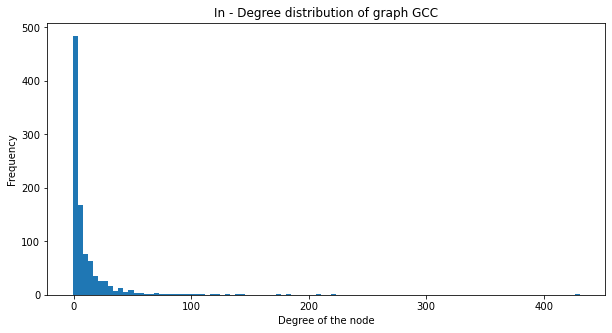

Slope of distribution: -1.0714517122628402


In [16]:
#In degree distribution & slope estimate
plot_deg_dist(GCC, in_degree = True, title = 'In - Degree distribution of graph GCC') 

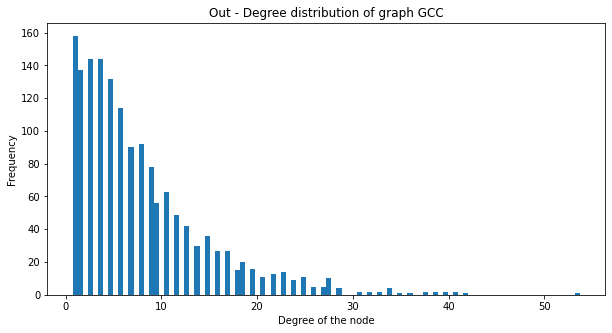

Slope of distribution: -0.12631066185633372


In [17]:
#Out degree distribution & slope estimate
plot_deg_dist(GCC, in_degree = False, title = 'Out - Degree distribution of graph GCC') 

100%|████████████████████████| 8000/8000 [03:15<00:00, 40.99it/s]


BarnesHut Approximation  took  97.15  seconds
Repulsion forces  took  87.46  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  3.72  seconds
AdjustSpeedAndApplyForces step  took  2.92  seconds


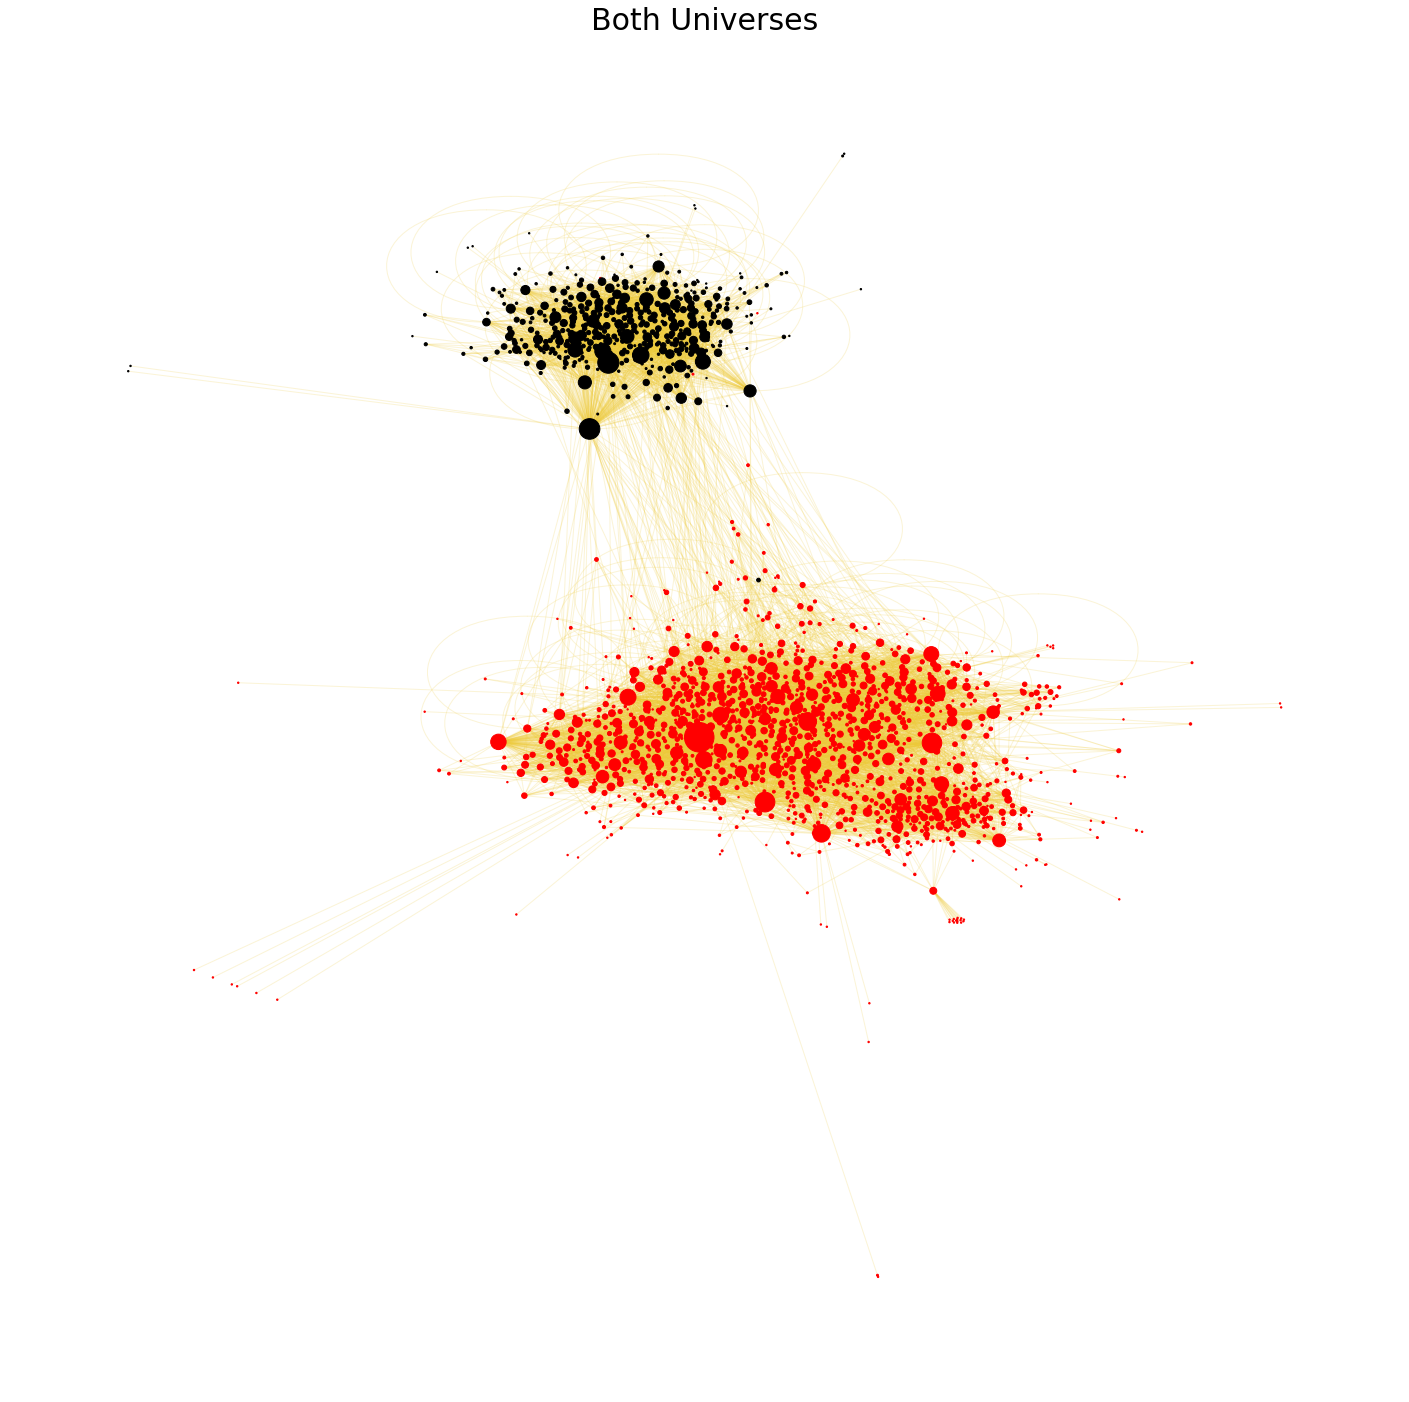

In [18]:
# Plot network using Force Atlas algorithm

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=7.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=True,
                        gravity=15.0,

                        # Log
                        verbose=True)



# Gets positions of the nodes 
positions = forceatlas2.forceatlas2_networkx_layout(GCC_U, pos=None, iterations=8000)

# Node size dictionary according to degrees
d = dict(nx.degree(GCC_U))

# Create color mapping dictionary
mapping = {"Marvel": 'red', "DC": 'black'}
colors = [mapping[GCC_U.nodes[n]['universe']] for n in GCC_U.nodes()]



# Plot the Network 
plt.figure(3,figsize=(25,25)) 
nc = nx.draw_networkx_nodes(GCC_U, 
                       positions, 
                       node_size=[v * 2 for v in d.values()], 
                       label=True,  
                       node_color=colors,
                       #cmap=plt.cm.plasma_r, 
                       )

ec = nx.draw_networkx_edges(GCC_U, 
                            positions, 
                            edge_color="#ECC836", 
                            alpha=0.2)

plt.axis('off')
plt.title('Both Universes', size = 30)
plt.show()

# Communities

Find and visualize the communities in one or both of the superhero universes (DC/Marvel) as described in Week 7.

Write a paragraph about your work to identify the communities. The paragraph should include

* Information about the algorithm you used to find communities.
* The value of modularity for your network.
* The number of communities and their sizes (in terms of number of nodes).

For the 10 largest communities, process the text in order to create a TF-IDF vector for each community. Explain in your own words how TF-IDF works.

Then visualize the TF-IDF vectors using wordclouds (as described in Week 7). Remember to comment on your word-clouds (e.g. in the figure captions): Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.
___________

## Answers

> **Find and visualize the communities in one or both of the superhero universes (DC/Marvel) as described in Week 7.**
>**Write a paragraph about your work to identify the communities. The paragraph should include:**
>* **Information about the algorithm you used to find communities.**
>* **The value of modularity for your network.**
>* **The number of communities and their sizes (in terms of number of nodes).**

>> _In order to find communities a python-louvian package function  was used. According to the package documentation (https://python-louvain.readthedocs.io/en/latest/api.html) the communities are found using the Louvain heuristices, by trying to find the partition that gives the highest modularity. Function returns the partition of highest modularity, i.e. the highest partition of the dendrogram generated by the Louvain algorithm_

>> _The partition found by algorithm has modularity $M=0.41$, what indicates that the network has the optimal community structure_

>> _Number of communities: 14_
>>*  _1 community of size 225 nodes was found_
>>*  _1 communities of size 91 nodes was found_
>>*  _1 communities of size 274 nodes was found_
>>*  _1 communities of size 204 nodes was found_
>>*  _1 communities of size 228 nodes was found_
>>*  _1 communities of size 51 nodes was found_
>>* _1 communities of size 114 nodes was found_
>>* _1 communities of size 17 nodes was found_
>>* _1 communities of size 65 nodes was found_
>>* _5 communities of size 1 nodes was found_

In [19]:
# Create DC and Marvel subgraphs from a connected component of the previous combined graph largest component GCC

nodes_DC = (node for node, data in GCC.nodes(data=True)
            if data.get("universe") == "DC")

subgraph_DC = GCC.subgraph(nodes_DC).copy()

nodes_marvel = (node for node, data in GCC.nodes(data=True)
                if data.get("universe") == "Marvel")

subgraph_marvel = GCC.subgraph(nodes_marvel).copy()

# From now on, focus on Marvel Universe
G_M = nx.to_undirected(subgraph_marvel)

# first compute the best partition
partition = community.best_partition(G_M)

# find modularity
M = community.modularity(partition, G_M)
print(f"Marvel subgraph modularity = {M} - found using community.modularity function")

Marvel subgraph modularity = 0.4093774038421582 - found using community.modularity function


In [20]:
#communities stats
count = Counter(partition.values())
print(f"Number of communities: {len(count)}")

count_size = Counter(count.values())

for key in count_size:
    print(f"{count_size[key]} communities of size {key} nodes was found")

Number of communities: 16
1 communities of size 217 nodes was found
1 communities of size 270 nodes was found
1 communities of size 221 nodes was found
1 communities of size 198 nodes was found
1 communities of size 85 nodes was found
1 communities of size 125 nodes was found
1 communities of size 78 nodes was found
1 communities of size 17 nodes was found
1 communities of size 29 nodes was found
1 communities of size 19 nodes was found
1 communities of size 10 nodes was found
5 communities of size 1 nodes was found


100%|████████████████████████| 1000/1000 [00:15<00:00, 63.76it/s]


BarnesHut Approximation  took  5.84  seconds
Repulsion forces  took  8.94  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.32  seconds
AdjustSpeedAndApplyForces step  took  0.26  seconds


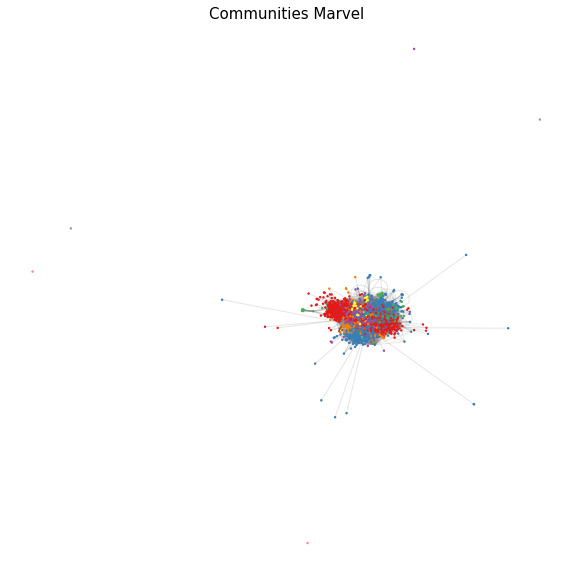

In [22]:
# Visualize with Force Atlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=7.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=True,
                        gravity=15.0,

                        # Log
                        verbose=True)

# Gets positions of the nodes 
positions = forceatlas2.forceatlas2_networkx_layout(G_M, pos=None, iterations=1000)

plt.figure(3,figsize=(10,10)) 

# color the nodes according to their partition
cmap = cm.get_cmap('Set1', max(partition.values()) + 1)

nc = nx.draw_networkx_nodes(G_M, 
                       positions, 
                       node_size=2.0, 
                       label=True,  
                       node_color=list(partition.values()),
                       cmap=cmap, 
                       )

ec = nx.draw_networkx_edges(G_M, 
                            positions, 
                            edge_color='gray', 
                            alpha=0.2)

plt.axis('off')
plt.title('Communities Marvel', size = 15)
plt.show()

> **For the 10 largest communities, process the text in order to create a TF-IDF vector for each community. Explain in your own words how TF-IDF works.**
>> _TF-IDF (term frequency-inverse document frequency) is a **statistical measure that evaluates how relevant a word is to a document in a collection of documents**. This is done by multiplying two metrics: how many times a word appears in a document (TF), and the inverse document frequency of the word across a set of documents (IDF)._
_TF-IDF was created for document search and information retrieval. It works by **increasing proportionally to the number of times a word appears in a document**, but at the same time is **offset by the number of documents that contain the word.** So, <u>words that are common in every document, rank low even though they may appear many times, since they don’t mean much to that document in particular</u>. However, if a particular word appears many times in a document, while not appearing as many times in others, it probably means that **it’s very relevant.** This is important if we are trying to find out topics within a set of documents._

>>_In our case working with communities within the marvel universe, this metric appears relevant. We want to filter out common words across all documents and search for the words that are more describing to a specific group of documents, to see if we can identify the comunity with them._

> _**Text already preprocessed in the imported dataset. Explanation and code on how we did it in the Appendix (end of the notebook)**_

In [23]:
# Add column with the community each character belongs to so we can retrieve the text from each
# community group and create the TF and wordcloud. 
df_marvel['community'] = df_marvel['WikiLink'].map(partition)
df_marvel.head(4)

,CharacterName,WikiLink,text_html,nodes,edges,plain_text,tokens,words,community
0,Abomination,Abomination (character),{{For|the biblical term|Abomination (Bible)}}\...,"[Red Hulk, Silver Surfer, Glenn Talbot, MODOK,...","[(Abomination (character), Red Hulk), (Abomina...",The Abomination is a fictional character appea...,"[The, Abomination, is, a, fictional, character...","[abomination, fictional, character, appearing,...",0.0
1,Absorbing Man,Absorbing Man,{{Short description|Marvel Comics fictional ch...,"[Black Bolt, Spider-Man, She-Hulk, Ethan Edwar...","[(Absorbing Man, Black Bolt), (Absorbing Man, ...","Absorbing Man (Carl ""Crusher"" Creel) is a fict...","[Absorbing, Man, (, Carl, ``, Crusher, '', Cre...","[absorbing, man, carl, crusher, creel, fiction...",0.0
5,Achebe,Achebe (comics),#REDIRECT [[Achebe (character)]]\n\n{{Redirect...,[],[],Achebe is a fictional supervillain appearing i...,"[Achebe, is, a, fictional, supervillain, appea...","[achebe, fictional, supervillain, appearing, a...",NaN
13,Agent,Agent (comics),{{Short description|Fictional character in Mar...,"[Luke Cage, Carol Danvers]","[(Agent (comics), Luke Cage), (Agent (comics),...",The Agent (Rick Mason) is a fictional characte...,"[The, Agent, (, Rick, Mason, ), is, a, fiction...","[agent, rick, mason, fictional, character, app...",0.0


In [24]:
# Size of each of the communities (by number of characters) sorted by size. 
# Taking the largest 10 
largest_com = dict(df_marvel['community'].value_counts().head(10))
list_largest_com = list(largest_com.keys())
print(f'The 10 biggest communities are: {np.sort(list_largest_com)}')

The 10 biggest communities are: [ 0.  1.  2.  3.  4.  5.  7.  8.  9. 10.]


In [25]:
# Extract text for a whole community (put together lists of words from all characters of that commnuity)
def text_community(df,com):
     # Filter community characters and text
    community = df[df['community'] == com]
    # Generate list of words of that community
    list_words_marvel_com = list([a for b in community['words'].tolist() for a in b]) 
    return list_words_marvel_com

# List of texts of the first 10 communities
values = []
for i in list_largest_com:
    values.append(text_community(df_marvel,i))

# Create a dictionary with the number of the community and it's corresponding text
dic_texts = {}
keys = range(10)
for i in keys:
    dic_texts[i] = values[i]

In [26]:
# Calculate TF and extract 5 most common words for each of the 10 largest communities in the marvel universe
def TF_com(dic_texts, printing=False):
     # List to store all TF for every community in the dictionary of texts
    TF_com_global = []
    for key, value in dic_texts.items():
        #TF for 1 community
        TF_com = FreqDist(value)
        TF_com_global.append(TF_com)
         #Most common 5 words for 1 community
        most_common_marvel_com = TF_com.most_common(5)
        print(f'Community {key}')
        print(most_common_marvel_com)
    return TF_com_global

In [27]:
# Print the 5 most common words of 10 different communities. 
TF_com_global = TF_com(dic_texts)

Community 0
[('mutant', 1826), ('new', 1788), ('powers', 1663), ('marvel', 1506), ('also', 1445)]
Community 1
[('marvel', 2271), ('new', 1233), ('character', 1209), ('avengers', 1181), ('later', 1097)]
Community 2
[('marvel', 2160), ('man', 2108), ('avengers', 1680), ('iron', 1442), ('stark', 1376)]
Community 3
[('peter', 1679), ('marvel', 1642), ('new', 1251), ('later', 1248), ('character', 1088)]
Community 4
[('marvel', 1128), ('character', 670), ('ghost', 642), ('rider', 594), ('later', 566)]
Community 5
[('namor', 904), ('marvel', 750), ('team', 480), ('phoenix', 476), ('comics', 410)]
Community 6
[('marvel', 643), ('new', 372), ('later', 348), ('character', 331), ('thunderbolts', 308)]
Community 7
[('nico', 407), ('chase', 259), ('runaways', 254), ('karolina', 233), ('molly', 207)]
Community 8
[('initiative', 136), ('marvel', 127), ('hulk', 96), ('thor', 92), ('man', 92)]
Community 9
[('kid', 259), ('red', 180), ('marvel', 166), ('fury', 135), ('commandos', 117)]


In [28]:
# Calculate IDF for each of the communities 
def IDF_com(TF_com_global,N):
    IDF_global = []
    for i in range(N):
        IDF = []
        for term, term_freq in TF_com_global[i].items():
            term_IDF = math.log(float(N) / term_freq + 1)
            IDF.append((term,term_IDF))
        IDF_global.append(IDF)

    return IDF_global

IDF_global = IDF_com(TF_com_global,N=10)

In [29]:
# Sort TF words to match the order of the IDF lists
TF_com_global_sorted = []
N=10
for i in range(N):
        TF_com_sorted = [] 
        for term, term_freq in TF_com_global[i].items():
                elem = (term,term_freq)
                #list of sorted words and freq of 1 comunnity
                TF_com_sorted.append(elem)
        # append it to the list of lists
        TF_com_global_sorted.append(TF_com_sorted)

In [30]:
# Calculate TF-IDF for each of the communities

def TF_IDF_com(TF_com_global_sorted,IDF_global):
    
    TF_IDF_global = []

    for i in range(N):
        # Convert to dict to multiply easy
        dict_1 = dict(TF_com_global_sorted[i])
        dict_2 = dict(IDF_global[i])
        result = {key: dict_1[key] * dict_2[key] for key in dict_1}
        
        #Append it to the list of communities
        TF_IDF_global.append(result) 
    return TF_IDF_global

# finally returns list of lists
TF_IDF_global = TF_IDF_com(TF_com_global_sorted,IDF_global)

>**Then visualize the TF-IDF vectors using wordclouds (as described in Week 7). Remember to comment on your word-clouds (e.g. in the figure captions): Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.**
>> _In order to compare the different communities we plot a maximum of 20 words per wordcloud. In our case, we argue that even if some of the wordclouds do help us to understand the community vaguely, for most of them is just gibberish. For instance, when looking at Community #3 we can see **Peter** appears as one of the most relevant words, and if we filter out the characters belonging to the same community we can see relationship between the characters from a SpiderMan subgroup (The first one that pops up is Agent X, which highly related). However, when looking at Communities like #4 or #9 the wordclouds don't give us a clear queue on the community overall ``topic" and therefore is hard to understand it._

In [31]:
wordclouds = []
for i in range(10):
    wordcloud = WordCloud(width=900,height=500, 
                            max_words=20,
                            background_color='white',
                            colormap= 'Set2',
                            collocations= False,
                            relative_scaling=1,
                            normalize_plurals=False).generate_from_frequencies(TF_IDF_global[i])
    wordclouds.append(wordcloud)

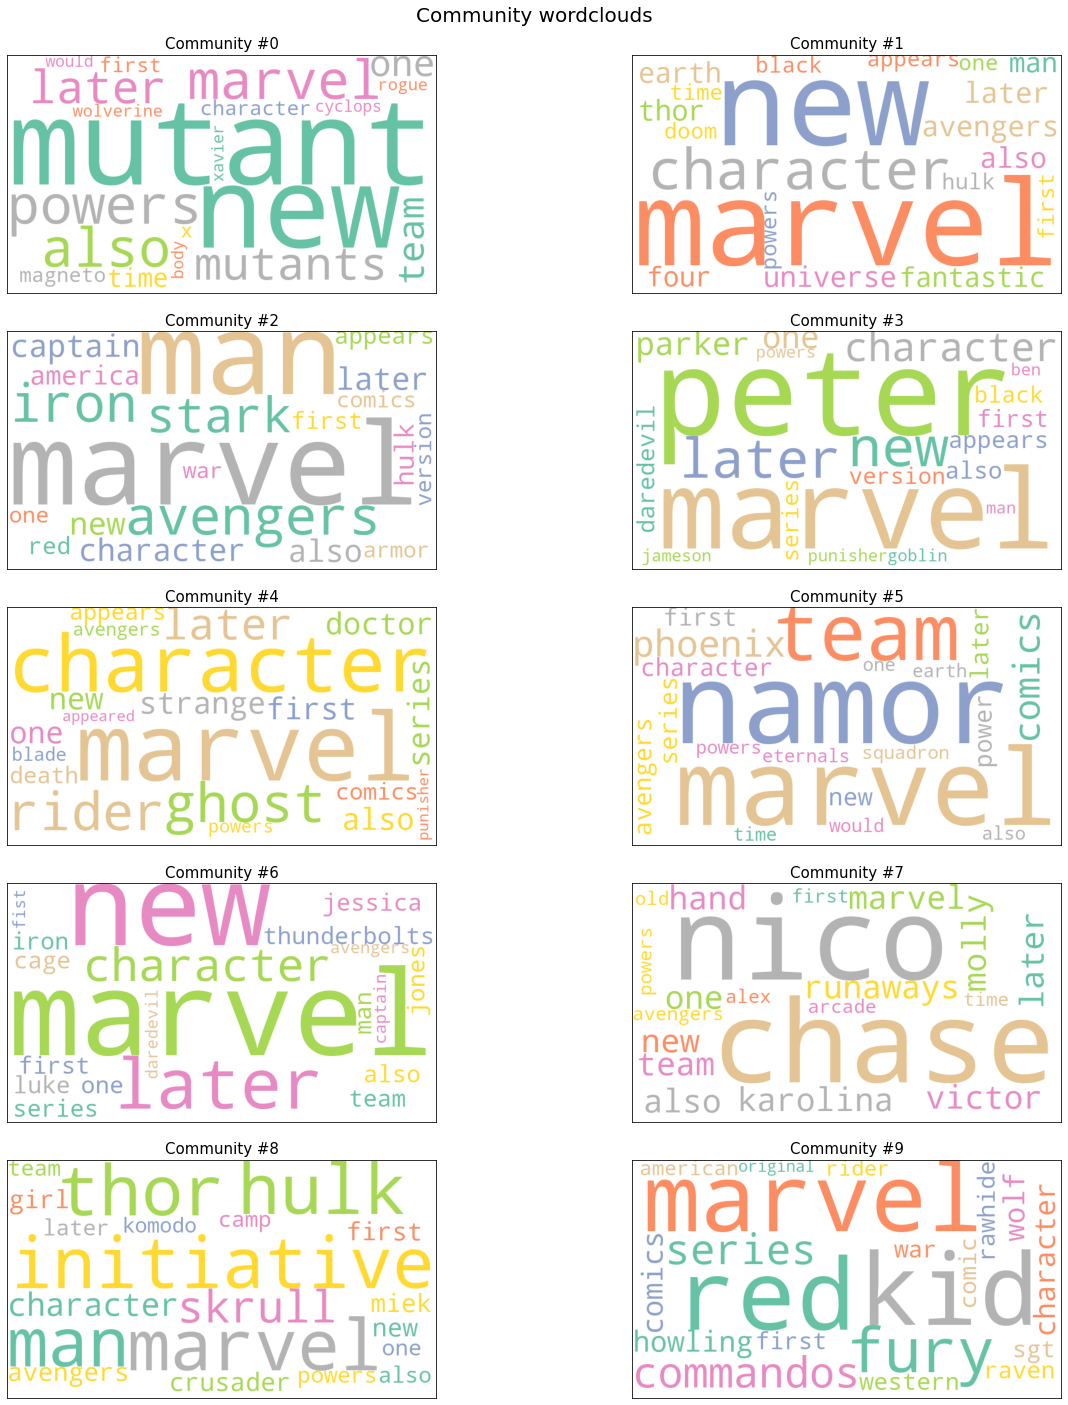

In [32]:
def display_wordcloud(wordclouds, title, n_components):
    fig = plt.figure(figsize=(20, 20))
    j = int(np.ceil(n_components/2))
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 2, i).set_title("Community #" + str(t), size=15)
        plt.tick_params(which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        labelbottom=False,
                        left= False,
                        labelleft = False) # labels along the bottom edge are off
                       
        plt.plot()
        plt.imshow(wordclouds[t])
        
    fig.suptitle(title, size = 20)
    plt.tight_layout(pad=2)
    plt.show()
    
display_wordcloud(wordclouds,'Community wordclouds',10)

In [33]:
# Filter a character of the community 2 to see if they belong to spiderman (peter parker) related charaters
df_marvel[df_marvel['community'] == 2].head(1)

,CharacterName,WikiLink,text_html,nodes,edges,plain_text,tokens,words,community
22,Air-Walker,Air-Walker,{{short description|Fictional character appear...,"[Silver Surfer, Galactus, Silver Surfer, Miste...","[(Air-Walker, Silver Surfer), (Air-Walker, Gal...",The Air-Walker (Gabriel Lan) (also known as Ga...,"[The, Air-Walker, (, Gabriel, Lan, ), (, also,...","[gabriel, lan, also, known, gabriel, fictional...",2.0


# Sentiment

First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.

Now grab the good/bad character names ([from this file](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv), see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.

Finally use the label permutation test (see Week 5) to investigate the two hypotheses below
* H1: Good characters have a higher averge value for sentiment than a similarly sized set of randomly selected characters.
* H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.

Write a short paragraph reflecting on your findings.
________

## Answers
>**First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.**

In [34]:
# Calculate sentiment for all pages in Marvel

url_happy = 'https://raw.githubusercontent.com/lucialarraona/socialgraphs2022/main/assignments/Data_Set_S1.txt'
df = pd.read_csv(url_happy, sep="\t", skiprows=3)

def calculate_sentiment(list_tokens,df):

    """"
    Based on the LabMT word list, 
    write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc)
    """

   # 1. Calculate the token frequency of the words in the text/ list of tokens given
    token_freq = dict(FreqDist(list_tokens))

    # 2. Select words that appear on the dic_happiness
    dic_happines = dict(zip(df.word,df.happiness_average))
    a = set(token_freq)
    b = set(dic_happines)
    words_intersect = set(a) & set(b)

    # 3. Multiply the token_freq of the intersection words with its happiness score and return weighted average
    list_freq_tokenlist = [token_freq[x] for x in words_intersect]
    list_score_tokenlist = [dic_happines[x] for x in words_intersect]
  
    sentiment_score = sum(x * y for x, y in zip(list_freq_tokenlist, list_score_tokenlist))/ len(list_tokens)
    sentiment_score

    return sentiment_score

In [35]:
df_marvel['happiness_score'] = df_marvel.apply(lambda x: calculate_sentiment(x['words'],df), axis=1)
df_marvel.head(1)

,CharacterName,WikiLink,text_html,nodes,edges,plain_text,tokens,words,community,happiness_score
0,Abomination,Abomination (character),{{For|the biblical term|Abomination (Bible)}}\...,"[Red Hulk, Silver Surfer, Glenn Talbot, MODOK,...","[(Abomination (character), Red Hulk), (Abomina...",The Abomination is a fictional character appea...,"[The, Abomination, is, a, fictional, character...","[abomination, fictional, character, appearing,...",0.0,3.235171


In [36]:
# Mean, 10th and 90th percentile of the sentiment

mean_marvel = df_marvel['happiness_score'].describe()['mean']

print(f'The mean of the sentiment in the Marvel Universe: {mean_marvel}')
print("90th percentile of the sentiment: ",
       np.percentile(df_marvel['happiness_score'], 90))

print("10th percentile of the sentiment: ",
       np.percentile(df_marvel['happiness_score'], 10))

# Add the percentiles to a list for the plotting
percentiles = [np.percentile(df_marvel['happiness_score'], 90), np.percentile(df_marvel['happiness_score'], 10)]

The mean of the sentiment in the Marvel Universe: 3.634829085296206
90th percentile of the sentiment:  4.132249289817563
10th percentile of the sentiment:  2.6


In [37]:
list_sentiment = list(zip(df_marvel['CharacterName'], df_marvel['happiness_score']))

In [38]:
def plot_pretty_hist(list_data, percentiles, mean, plot_perct = False, title = str, color=str):
    
    x = [val for (node, val) in list_data]
    fig,ax = plt.subplots(figsize = (10,6))
    cnts, values, bars = ax.hist(x, edgecolor='black', 
                                     bins=10,
                                     color=color,
                                     alpha = 0.2)
    
    if plot_perct == True:
        # Plot mean
        ax.axvline(mean, color='black', linestyle = '-', linewidth=4) 
        # Plot percentiles and mean lines
        quants = [[percentiles[0], 0.8, 0.90], [percentiles[1], 0.8, 0.40]]
        for i in quants:
            ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color = 'Red' ,linewidth=3)  

        
        # Labels and titles
        ax.set_ylabel("Page Count")
        ax.set_xlabel("Average Sentiment")
        ax.set_title(f"{title}")
        ax.legend(['Mean','90th percentile','10th percentile'])
        caption = ("Figure: Histogram of the mean average of every character page for the Marvel universe.\n"
                   "Black line represents the mean across pages and the red dotted lines the 10th and 90th percentile respectively.")
        fig.text(0.02,-0.1, caption, ha='left')
        
        # Remove ticks and spines
        for ax, spine in ax.spines.items():
            spine.set_visible(True)
        plt.show()
        
      
    
    else:
        
        # Plot the mean
        ax.axvline(mean, color='black', linewidth=4) 
        
        # Labels and titles
        ax.set_ylabel("Page Count")
        ax.set_xlabel("Average Sentiment")
        ax.set_title(f"{title}")
        ax.legend(['Mean'])
        caption = ('haha')
        fig.text(0.02,-0.1, caption, ha='left')
        
        # Remove ticks and spines
        for ax, spine in ax.spines.items():
            spine.set_visible(True)
        plt.show()
  
    return None

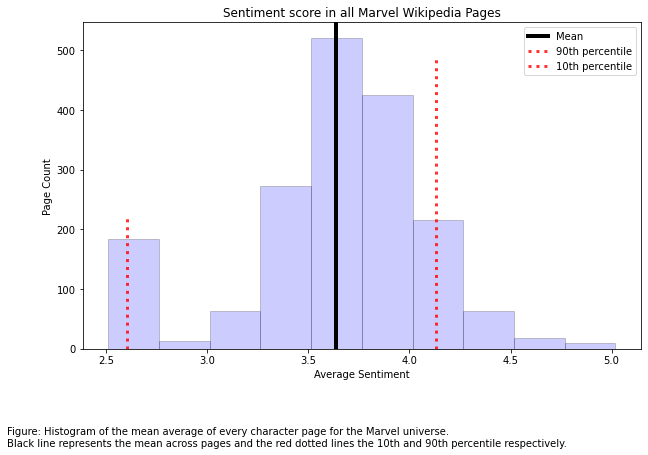

In [39]:
plot_pretty_hist(list_sentiment,percentiles, mean_marvel, plot_perct= True, 
                 title="Sentiment score in all Marvel Wikipedia Pages",
                 color = 'blue')

> **Now grab the good/bad character names ([from this file](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv), see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.**

In [40]:
# Download the good/bad character file
path = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv'
df_new = pd.read_csv(path)

# Filter the Marvel Universe
df_new = df_new[df_new['universe']=='Marvel']
df_new.columns
df_new = df_new.drop(columns = 'Unnamed: 0')
print(df_new.shape)

# Merge with our marvel dataframe with the wikipedia pages
merge_marvel = pd.merge(df_marvel, df_new, on='WikiLink', how='outer')
print(merge_marvel.shape)
merge_marvel.head(1)

(1785, 7)
(1785, 16)


,CharacterName_x,WikiLink,text_html,nodes,edges,plain_text,tokens,words,community,happiness_score,CharacterName_y,universe,woman,man,good,bad
0,Abomination,Abomination (character),{{For|the biblical term|Abomination (Bible)}}\...,"[Red Hulk, Silver Surfer, Glenn Talbot, MODOK,...","[(Abomination (character), Red Hulk), (Abomina...",The Abomination is a fictional character appea...,"[The, Abomination, is, a, fictional, character...","[abomination, fictional, character, appearing,...",0.0,3.235171,Abomination,Marvel,0,1,0,1


In [41]:
# Create good and bad character groups 
merge_marvel_good = merge_marvel[merge_marvel['good'] == 1]
merge_marvel_bad = merge_marvel[merge_marvel['bad'] == 1]

In [42]:
# Mean, 10th and 90th percentile of the sentiment (GOOD CHARACTERS)
mean_marvel_good = merge_marvel_good['happiness_score'].describe()['mean']
print(f'The mean of the sentiment in the Marvel Universe (Good Characters): {mean_marvel_good}')
print("90th percentile of the sentiment: ",
       np.percentile(merge_marvel_good['happiness_score'], 90))

print("10th percentile of the sentiment: ",
       np.percentile(merge_marvel_good['happiness_score'], 10))

# Add the percentiles to a list for the plotting
percentiles_good = [np.percentile(merge_marvel_good['happiness_score'], 90), 
                    np.percentile(merge_marvel_good['happiness_score'], 10)]

The mean of the sentiment in the Marvel Universe (Good Characters): 3.657925283740786
90th percentile of the sentiment:  4.189821411729362
10th percentile of the sentiment:  2.6


In [43]:
# Mean, 10th and 90th percentile of the sentiment (BAD CHARACTERS)
mean_marvel_bad = merge_marvel_bad['happiness_score'].describe()['mean']
print(f'The mean of the sentiment in the Marvel Universe (Bad Characters): {mean_marvel_bad}')
print("90th percentile of the sentiment: ",
       np.percentile(merge_marvel_bad['happiness_score'], 90))

print("10th percentile of the sentiment: ",
       np.percentile(merge_marvel_bad['happiness_score'], 10))
# Add the percentiles to a list for the plotting
percentiles_bad = [np.percentile(merge_marvel_bad['happiness_score'], 90), 
                   np.percentile(merge_marvel_bad['happiness_score'], 10)]

The mean of the sentiment in the Marvel Universe (Bad Characters): 3.550388729651913
90th percentile of the sentiment:  3.982250817444059
10th percentile of the sentiment:  3.090620416856839


In [44]:
list_good = list(zip(merge_marvel_good['CharacterName_x'], merge_marvel_good['happiness_score']))
list_bad = list(zip(merge_marvel_bad['CharacterName_x'], merge_marvel_bad['happiness_score']))

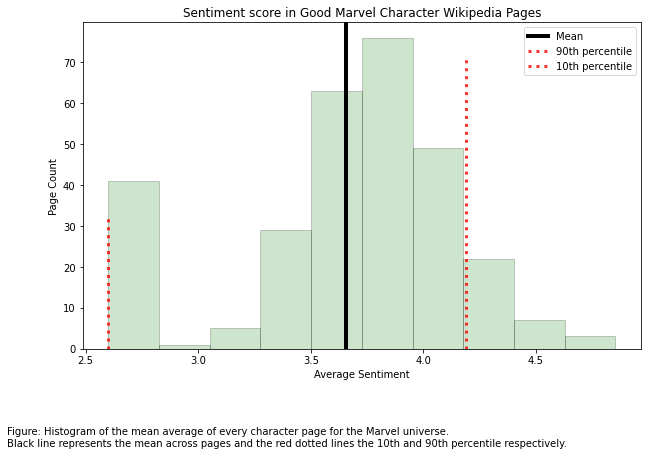

In [45]:
plot_pretty_hist(list_good,percentiles_good, mean_marvel_good,plot_perct=True, 
                 title= "Sentiment score in Good Marvel Character Wikipedia Pages",
                 color = 'green')

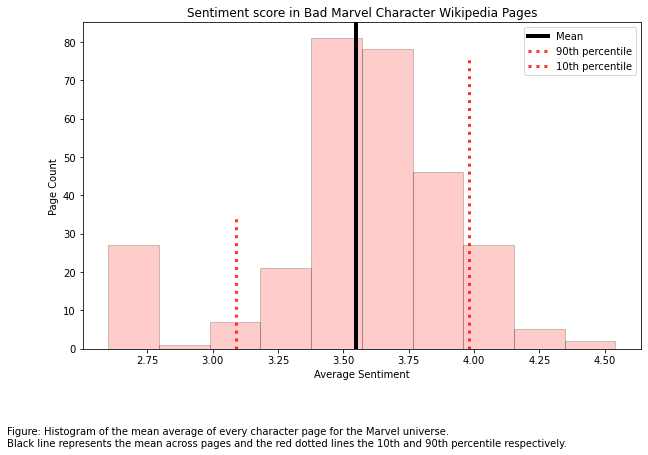

In [46]:
plot_pretty_hist(list_bad,percentiles_bad, mean_marvel_bad, plot_perct=True,
                title= "Sentiment score in Bad Marvel Character Wikipedia Pages",
                color = 'red')

> **Finally use the label permutation test (see Week 5) to investigate the two hypotheses below**
>* **H1: Good characters have a higher averge value for sentiment than a similarly sized set of randomly selected characters.**
>* **H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.**
>* **Write a short paragraph reflecting on your findings.**

In [47]:
# Shuffle the good/bad attribute

avg_score_marvel_shuffle_good = []
avg_score_marvel_shuffle_bad = []
avg_score_marvel_true = []
avg_score_marvel_bad = []


for _ in range(1000):
    
    # Create a list of shuffled good attribute and append it to the merge_marvel
    merge_marvel['good_shuffled'] = np.random.permutation(merge_marvel['good'])
    merge_marvel['bad_shuffled'] = np.random.permutation(merge_marvel['bad'])
    
    # Create a new df for every iteration on the loop 
    df_test = pd.DataFrame() 
    df_test['CharacterName'] = merge_marvel['CharacterName_x']       #character
    df_test['good_true'] = merge_marvel['good']              #true labels
    df_test['bad_true'] = merge_marvel['bad'] # true labels
    df_test['good_shuffled'] = merge_marvel['good_shuffled'] #shuffled labels
    df_test['bad_shuffled'] = merge_marvel['bad_shuffled']  #shuffled labels
    df_test['happiness_score'] = merge_marvel['happiness_score']


    # group with just characters and shuffled labels (random group)
    shuffled_group_good = df_test[df_test['good_shuffled']== 1] # good characters
    avg_score_marvel_shuffle_good.append(np.mean(shuffled_group_good['happiness_score'])) 
    
    # group with just characters and shuffled labels (random group)
    shuffled_group_bad = df_test[df_test['bad_shuffled']== 1] # bad characters
    avg_score_marvel_shuffle_bad.append(np.mean(shuffled_group_bad['happiness_score']))

# group with just characters and their true labels 
true_group_good = merge_marvel[merge_marvel['good'] == 1]
avg_score_marvel_true_good = np.mean(true_group_good['happiness_score']) #it will always be the same number because of the true labels

# group with just characters and their true labels 
true_group_bad = merge_marvel[merge_marvel['bad'] == 1]
avg_score_marvel_true_bad = np.mean(true_group_bad['happiness_score']) #it will always be the same number because of the true labels


In [48]:
def plot_pretty_hist_pair(shuffled_group_good, true_group_good, shuffled_group_bad, true_group_bad):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))


    # H1
    list_shuffle_good = list(zip(shuffled_group_good['CharacterName'], shuffled_group_good['happiness_score']))
    x_good = [val for (node, val) in list_shuffle_good]
    
    cnts, values, bars = ax1.hist(x_good, edgecolor='black', 
                                     bins=20,
                                     color='green',
                                     alpha = 0.2)

    # Mean of shuffled labels
    ax1.axvline(mean(avg_score_marvel_shuffle_good), color='green', linewidth=2)
    # Mean of true labels
    ax1.axvline(avg_score_marvel_true_good, color='black', linewidth=2)

    # Labels and titles
    ax1.set_ylabel("Page Count")
    ax1.set_xlabel("Average Sentiment")
    ax1.set_title("Sentiment score in Good Marvel Wikipedia Pages: True vs shuffled labels")
    ax1.legend(['Mean Shuffled Good Characters','Mean True Good Characters'])


    
    
    # ----------------------------
    
    # H2
    list_shuffle = list(zip(shuffled_group_bad['CharacterName'], shuffled_group_bad['happiness_score']))
    x = [val for (node, val) in list_shuffle]
    cnts, values, bars = ax2.hist(x, edgecolor='black', 
                                     bins=20,
                                     color='red',
                                     alpha = 0.2)
    # Mean of shuffled labels
    ax2.axvline(mean(avg_score_marvel_shuffle_bad), color='red', linewidth=2) 
    # Mean of true labels
    ax2.axvline(avg_score_marvel_true_bad, color='black', linewidth=2) 
    

    # Labels and titles
    ax2.set_ylabel("Page Count")
    ax2.set_xlabel("Average Sentiment")
    ax2.set_title("Sentiment score in Bad Marvel Wikipedia Pages: True vs shuffled labels")
    ax2.legend(['Mean Shuffled Bad Characters','Mean True Bad Characters'])


    plt.show()

    pass

    return None

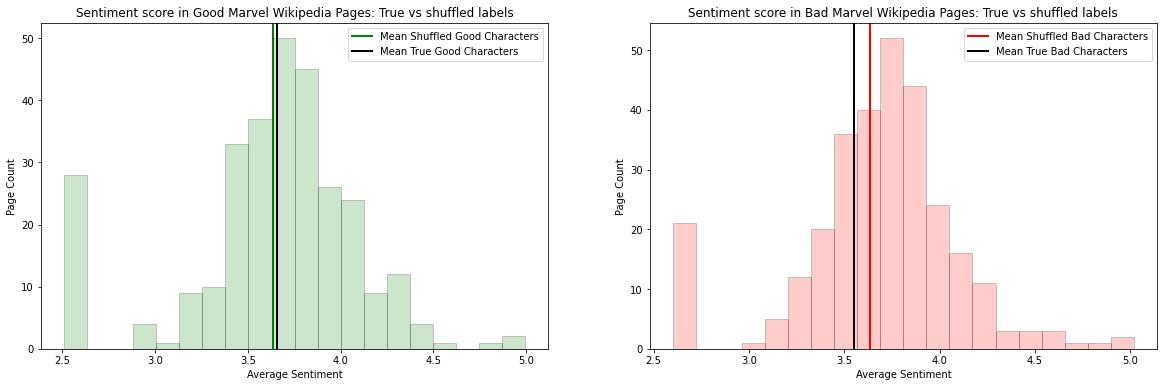

In [49]:
plot_pretty_hist_pair(shuffled_group_good, true_group_good, shuffled_group_bad, true_group_bad)



> _Looking at the results previously obtained when evaluating the sentiment for the whole marvel universe, we can see that the results differ when we separate into good and bad characters, as we expected._

> _Now, comparing the results for good and bad characters separated, we can see they vary but not by much. The true mean for the good characters group stands in 3.67, and the true mean for the bad characters stays at 3.55. It seems that characters cannot be clearly distinguished based on the sentiment value. Most likely, this is due to the specifics of the text contained in the pages describing the characters. When looking at the wikipedia pages, it can be noticed that in both cases(good and bad), the texts contain words with negative sentiments such as **fight, crime, etc** which impacts the overall perception of the content._

> _Finally, the results of **the label permutation test proves that both hypothesis H1 and H2 are true**.The mean of the true good characters is higher than a random group of characters with shuffled labels, and the mean of the true bad characters is lower than a random group of characters with shuffled labels. Nevertheless, the differences between average sentiment for shuffled and true groups are again, quite small in both cases. The subtle differences between this values are caused by the average sentiment values for a good and bad characters, which we already observed that are very similar._

>_As a group, we believe that the function for calculating the sentiment could be improved, and that this test could (and should), be performed again later on._

# Appendix - Preprocessing of data

### Obtaining nodes and edges from html text of wikipedia pages
> This takes a long time to run (around 15-20 mins), therefore we decided to show the code but only run it if optional.

In [44]:
import pandas as pd 
import io
import requests

url="https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/main/files/marvel.csv"
df_marvel = pd.read_csv(url,index_col=0)
df_marvel = df_marvel.dropna()

url="https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/main/files/dc.csv"
df_DC = pd.read_csv(url,index_col=0)
df_DC = df_DC.dropna()

In [45]:
def retrieve_text(wiki_link):
 
    try:
        baseurl = "https://en.wikipedia.org/w/api.php?"
        action = "action=query"
        title = 'titles=' + wiki_link.replace(" ", "_" )
        content = "prop=revisions&rvprop=content"
        dataformat ="format=json"

        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        wiki_text = json.loads(wikitext)
        mid_dic = wiki_text['query']['pages'].values()
        page_id = next(iter(mid_dic))
        text_only = page_id['revisions'][0]['*']
    
    except:
        return 'ERROR' # some of the links are not working so we just add an ERROR text instead
        
    return text_only

In [ ]:
# For DC and Marvel separately
df_DC['text'] = df_DC.apply(lambda x: retrieve_text(x['WikiLink']), axis=1)
df_marvel['text'] = df_marvel.apply(lambda x: retrieve_text(x['WikiLink']), axis=1)

In [ ]:
def retrieve_links_ok(text):
    
    # merge all values from marvel and dc
    all_values = np.append(df_marvel['WikiLink'].values, df_DC['WikiLink'])
    all_values = list(all_values)
    
    #find hyperlinks
    links_page = re.findall(r'\[\[(?:[^|\]]*\|)?([^\]]+)\]\]',text)
    
    #filter the links only the ones from marvel or dc 
    links_ok = [item for item in links_page if item in all_values]
    
    return links_ok

def get_edges(row):
    
    # merge all values from marvel and dc
    all_values = np.append(df_marvel['WikiLink'].values, df_DC['WikiLink'])
    all_values = list(all_values)
    
    #find hyperlinks
    links_page = re.findall(r'\[\[(?:[^|\]]*\|)?([^\]]+)\]\]',row['text'])
    
    #filter the links only the ones from marvel or dc 
    links_ok = [item for item in links_page if item in all_values]

    #make tuples with link and node from node list (links_ok)
    edges = [(row['WikiLink'], item ) for item in links_ok] 
    
    return edges

In [ ]:
df_DC['nodes'] = 0
df_DC['nodes'] = df_DC['nodes'].astype(object)
df_DC['nodes'] = df_DC.apply(lambda x: retrieve_links_ok(x['text']), axis=1)


df_DC['edges'] = 0
df_DC['edges'] = df_DC['nodes'].astype(object)
df_DC['edges'] = df_DC.apply(lambda x: get_edges(x), axis=1)

In [ ]:
df_marvel['nodes'] = 0
df_marvel['nodes'] = df_marvel['nodes'].astype(object)
df_marvel['nodes'] = df_marvel.apply(lambda x: retrieve_links_ok(x['text']), axis=1)


df_marvel['edges'] = 0
df_marvel['edges'] = df_marvel['nodes'].astype(object)
df_marvel['edges'] = df_marvel.apply(lambda x: get_edges(x), axis=1)

In [ ]:
df_marvel

### Obtaining plain text, tokens and final words from wikipedia pages

In [53]:
%%capture
!pip install wikipedia
import wikipedia

In [ ]:
def retrieve_plain_text(wiki_link):
    try:
        plain_text = wikipedia.page(wiki_link).content
    except:
        return 'ERROR' # some of the links are not working so we just add an ERROR text instead
    return plain_text

# Functions to remove punctuation and lowercase everything from tokens list
def remove_punctuation(list_words):
    words = [word.lower() for word in list_words if word.isalpha()]
    return words 

def remove_stopwords(tokens):
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    return filtered_words

In [ ]:
#----------------------------- Text preprocessing -----------------------------

# Retrieve plain text 
df_marvel['plain_text'] = df_marvel.apply(lambda x: retrieve_plain_text(x['WikiLink']), axis=1)

# Tokenize
df_marvel['tokens'] = df_marvel.apply(lambda x: word_tokenize(x['plain_text']), axis=1)

# Get list of clean words in a new column
df_marvel['words'] = df_marvel.apply(lambda x: remove_punctuation(x['tokens']), axis=1)

# Filter stopwords
df_marvel['words'] = df_marvel.apply(lambda x: remove_stopwords(x['words']), axis=1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb8bd0b6-4d87-4bed-87c7-5404ec14f478' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>